## Logistic Regression

### - Building a logistic regression model to assign a lead score between 0 and 100 to each of the leads, which can be used by the company to target potential leads

### Importing Libraries

In [3]:
# imporitng relevant libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

# A.Data Preparation and EDA

### Reading the csv file

In [4]:
# retrieving data

data = pd.read_csv('Leads.csv')
data

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


In [5]:
# checking the shape of the dataset 

data.shape

(9240, 37)

### Understanding Data

In [6]:
data.describe(include='all')

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240.000000,9240,9204,9240,9240,9240.000000,9103.000000,9240.000000,9103.000000,...,9240,6531,7820,5022,5022,5022.000000,5022.000000,9240,9240,9240
unique,9240,NaN,5,21,2,2,NaN,NaN,NaN,NaN,...,1,6,7,3,3,NaN,NaN,1,2,16
top,7927b2df-8bba-4d29-b9a2-b6e0beafe620,NaN,Landing Page Submission,Google,No,No,NaN,NaN,NaN,NaN,...,No,Select,Mumbai,02.Medium,02.Medium,NaN,NaN,No,No,Modified
freq,1,NaN,4886,2868,8506,9238,NaN,NaN,NaN,NaN,...,9240,4146,3222,3839,2788,NaN,NaN,9240,6352,3407
mean,NaN,617188.435606,NaN,NaN,NaN,NaN,0.385390,3.445238,487.698268,2.362820,...,NaN,NaN,NaN,NaN,NaN,14.306252,16.344883,NaN,NaN,NaN
std,NaN,23405.995698,NaN,NaN,NaN,NaN,0.486714,4.854853,548.021466,2.161418,...,NaN,NaN,NaN,NaN,NaN,1.386694,1.811395,NaN,NaN,NaN
min,NaN,579533.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,7.000000,11.000000,NaN,NaN,NaN
25%,NaN,596484.500000,NaN,NaN,NaN,NaN,0.000000,1.000000,12.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,14.000000,15.000000,NaN,NaN,NaN
50%,NaN,615479.000000,NaN,NaN,NaN,NaN,0.000000,3.000000,248.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,14.000000,16.000000,NaN,NaN,NaN
75%,NaN,637387.250000,NaN,NaN,NaN,NaN,1.000000,5.000000,936.000000,3.000000,...,NaN,NaN,NaN,NaN,NaN,15.000000,18.000000,NaN,NaN,NaN


In [7]:
# checking the names of the columns

data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [8]:
# rounding the percentage of null value in a column to 2

round(data.isnull().sum()/len(data),2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      0.01
Total Time Spent on Website                      0.00
Page Views Per Visit                             0.01
Last Activity                                    0.01
Country                                          0.27
Specialization                                   0.16
How did you hear about X Education               0.24
What is your current occupation                  0.29
What matters most to you in choosing a course    0.29
Search                                           0.00
Magazine                                         0.00
Newspaper Article           

In [9]:
# Checking which columns contain the value 'Select'

data.columns[data.isin(['Select']).any()]

Index(['Specialization', 'How did you hear about X Education', 'Lead Profile',
       'City'],
      dtype='object')

In [10]:
data.Specialization.value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [11]:
# Checking which columns contain the value 'Select'

data.columns[data.isin(['Select']).any()]

# replacing Select Value with nan in the 'Specialization' column

data['Specialization'].replace(np.nan,'Select', inplace=True)

# replacing Select Value with nan in the 'How did you hear about X Education' column

data['How did you hear about X Education'].replace(np.nan,'Select', inplace =True)

# replacing Select Value with nan in the 'Lead Profile' column

data['Lead Profile'].replace(np.nan,'Select', inplace = True)

# replacing Select Value with nan in the 'City' column

data['City'].replace(np.nan,'Select', inplace = True)

In [12]:
data.Specialization.value_counts()

Select                               3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [13]:
data['How did you hear about X Education'].value_counts()

Select                   7250
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [14]:
data['Lead Profile'].value_counts()

Select                         6855
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [15]:
data['City'].value_counts()

Select                         3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [16]:
data

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,Select,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


In [17]:
# initializing the number of rows before dropping columns

total_rows_before = len(data)
total_rows_before

9240

In [18]:
# 'Lead Quality' is a categorial variable with 5 levels

data['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

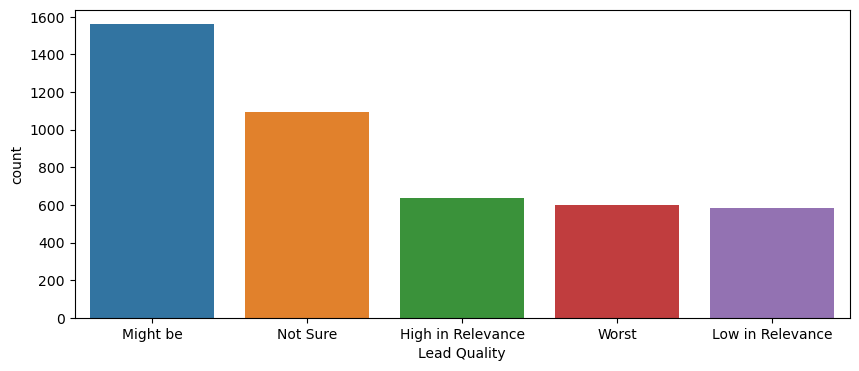

In [19]:
# visualizing the spread of data in 'Lead Quality' column

plt.figure(figsize=(10,4))
order=data['Lead Quality'].value_counts().index
sns.countplot(x='Lead Quality', data=data, order=order)

plt.show()

In [20]:
# 'What matters most to you in choosing a course' is a categorial variable with 3 levels

data['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

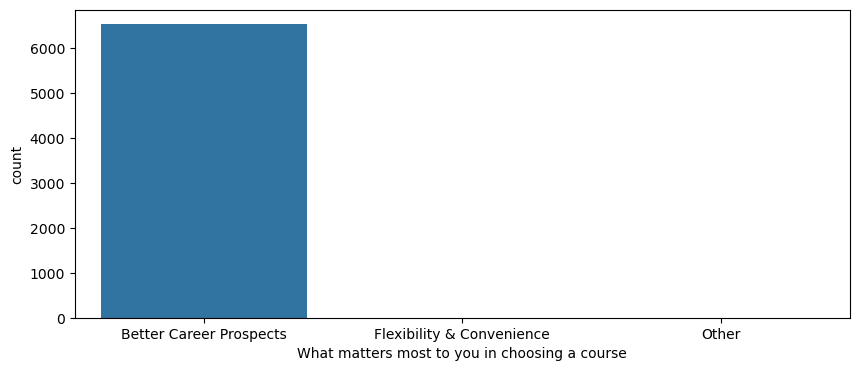

In [21]:
# visualizing the spread of data in 'What matters most to you in choosing a course' column

plt.figure(figsize=(10,4))
order=data['What matters most to you in choosing a course'].value_counts().index
sns.countplot(x='What matters most to you in choosing a course', data=data, order=order)

plt.show()

In [22]:
def group_low_value_counts(data, column_name, threshold=8):
    """
    Group low-value counts in a column into an 'Others' category.

    Parameters:
        df (pandas DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column to process.
        threshold (int): The threshold below which data will be grouped into 'Others'.
                         Defaults to 100.

    Returns:
        pandas DataFrame: The updated DataFrame with 'Others' category.
    """
    # Count the occurrences of each value in the column
    value_counts = data[column_name].value_counts()

    # Identify values with counts below the threshold
    low_value_counts = value_counts[value_counts < threshold].index

    # Replace those values with 'Others'
    data.loc[data[column_name].isin(low_value_counts), column_name] = 'Others'

    return data

# Example usage:
# Assuming your DataFrame is called 'data' and the column to process is 'category_column'
data = group_low_value_counts(data, 'Country', threshold=8)

In [23]:
# 'Country' is a categorial variable with 9 levels

data['Country'].value_counts()

India                   6492
Others                    82
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Name: Country, dtype: int64

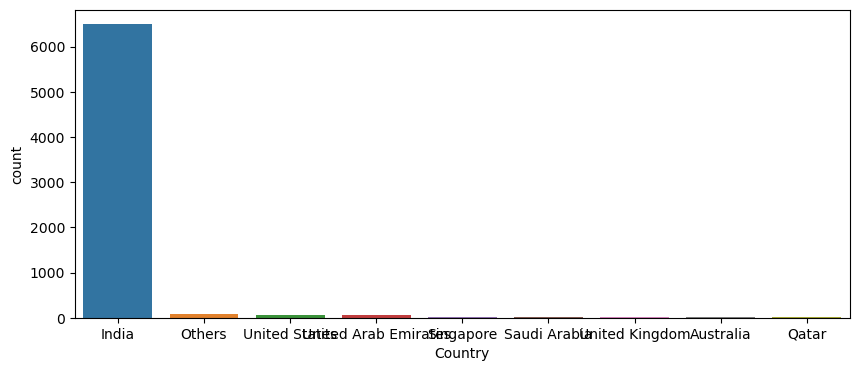

In [24]:
# visualizing the spread of data in 'Country' column

plt.figure(figsize=(10,4))
order=data['Country'].value_counts().index
sns.countplot(x='Country', data=data, order=order)

plt.show()

In [25]:
# 'What is your current occupation' is a categorial variable with 2 levels

data['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

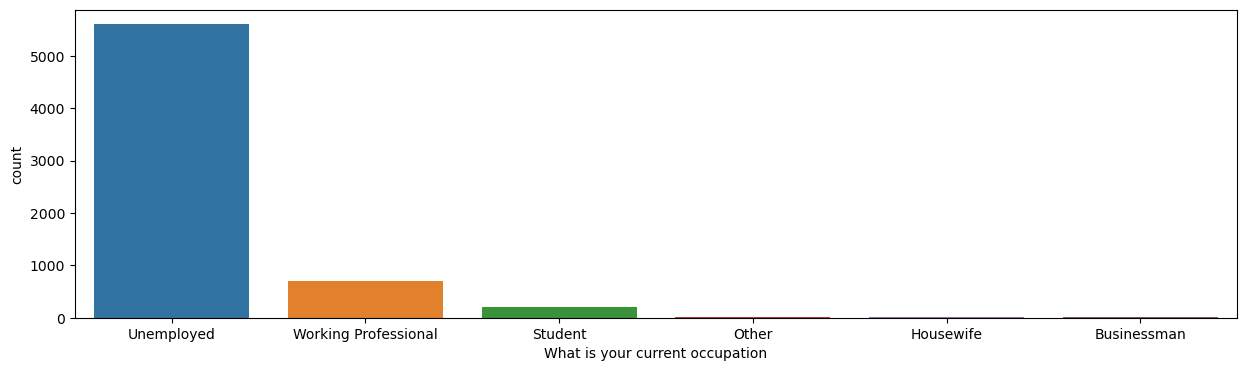

In [26]:
# visualizing the spread of data in 'What is your current occupation' column

plt.figure(figsize=(15,4))
order=data['What is your current occupation'].value_counts().index
sns.countplot(x='What is your current occupation', data=data, order=order)

plt.show()

In [27]:
def group_low_value_counts(data, column_name, threshold=150):
    """
    Group low-value counts in a column into an 'Others' category.

    Parameters:
        df (pandas DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column to process.
        threshold (int): The threshold below which data will be grouped into 'Others'.
                         Defaults to 100.

    Returns:
        pandas DataFrame: The updated DataFrame with 'Others' category.
    """
    # Count the occurrences of each value in the column
    value_counts = data[column_name].value_counts()

    # Identify values with counts below the threshold
    low_value_counts = value_counts[value_counts < threshold].index

    # Replace those values with 'Others'
    data.loc[data[column_name].isin(low_value_counts), column_name] = 'Others'

    return data

# Example usage:
# Assuming your DataFrame is called 'data' and the column to process is 'category_column'
data = group_low_value_counts(data, 'Tags', threshold=150)

In [28]:
# 'Tags' is a categorial variable with 9 levels

data['Tags'].value_counts()

Will revert after reading the email    2072
Ringing                                1203
Others                                  675
Interested in other courses             513
Already a student                       465
Closed by Horizzon                      358
switched off                            240
Busy                                    186
Lost to EINS                            175
Name: Tags, dtype: int64

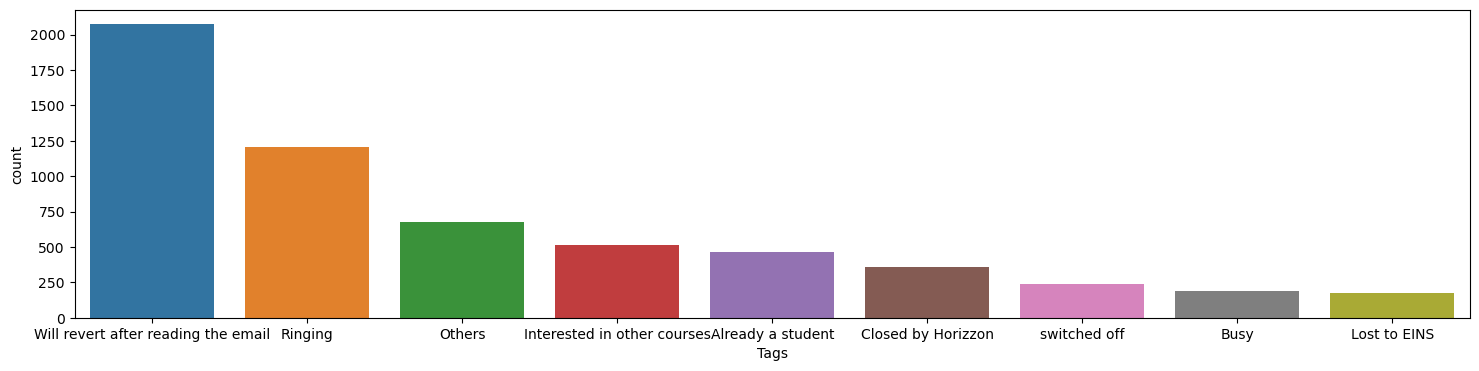

In [29]:
# visualizing the spread of data in 'Tags' column

plt.figure(figsize=(18,4))
order=data['Tags'].value_counts().index
sns.countplot(x='Tags', data=data, order=order)

plt.show()

In [30]:
# putting the values with less than 100 occurences in one category - other

lis_ls = ['Facebook','bing','google','Click2call','Live Chat','Social Media','Press_Release','blog','Pay per Click Ads','welearnblog_Home','WeLearn','testone','NC_EDM','youtubechannel']

data['Lead Source'] = data['Lead Source'].apply(lambda x : 'Other_ls' if x in lis_ls else x)


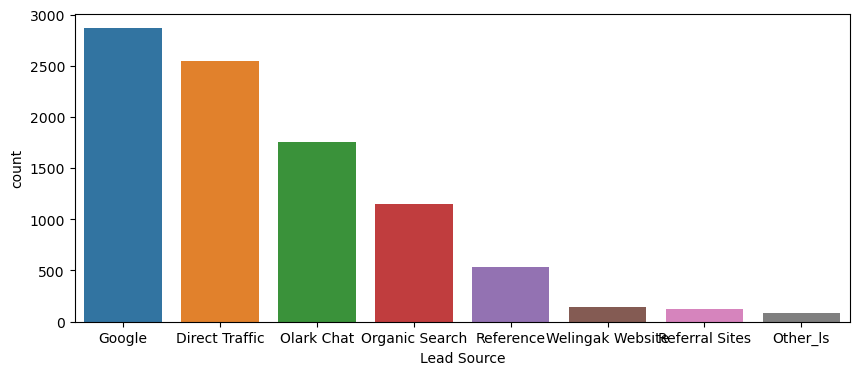

In [31]:
# visualizing the spread of data in 'Lead Source' column

plt.figure(figsize=(10,4))
order=data['Lead Source'].value_counts().index
sns.countplot(x='Lead Source', data=data, order=order)

plt.show()

In [32]:
# putting the values with less than 100 occurences in one category - other

lis_ed = ['Advertisements','Social Media','Email','SMS','Other']

data['How did you hear about X Education'] = data['How did you hear about X Education'].apply(lambda x : 'Other_ed' if x in lis_ed else x)

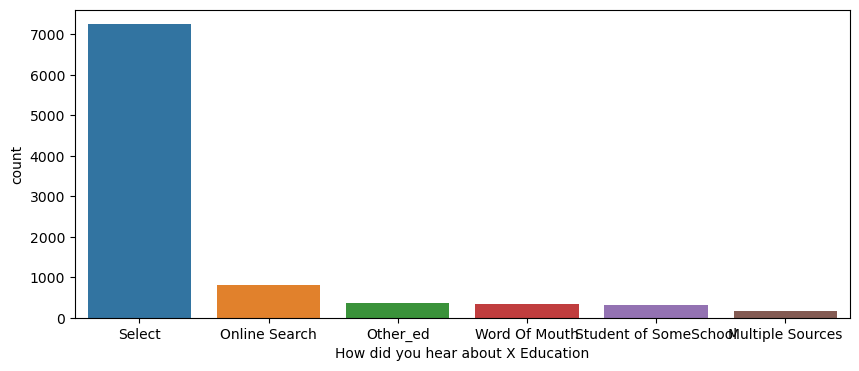

In [33]:
# visualizing the spread of data in 'Lead Source' column

plt.figure(figsize=(10,4))
order=data['How did you hear about X Education'].value_counts().index
sns.countplot(x='How did you hear about X Education', data=data, order=order)

plt.show()

In [34]:
lis_lp = ['Lateral Student','Dual Specialization Student']

data['Lead Profile'] = data['Lead Profile'].apply(lambda x : 'Other_lp' if x in lis_lp else x)

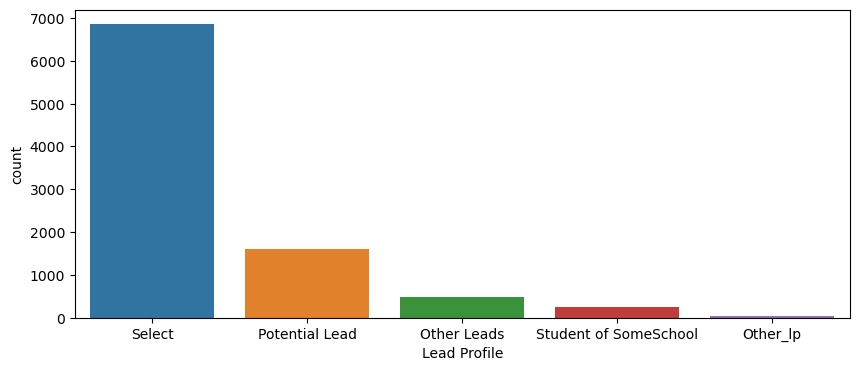

In [35]:
# visualizing the spread of data in 'Lead Source' column

plt.figure(figsize=(10,4))
order=data['Lead Profile'].value_counts().index
sns.countplot(x='Lead Profile', data=data, order=order)

plt.show()

In [36]:
def group_low_value_counts(data, column_name, threshold=2205):
    """
    Group low-value counts in a column into an 'Others' category.

    Parameters:
        df (pandas DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column to process.
        threshold (int): The threshold below which data will be grouped into 'Others'.
                         Defaults to 100.

    Returns:
        pandas DataFrame: The updated DataFrame with 'Others' category.
    """
    # Count the occurrences of each value in the column
    value_counts = data[column_name].value_counts()

    # Identify values with counts below the threshold
    low_value_counts = value_counts[value_counts < threshold].index

    # Replace those values with 'Others'
    data.loc[data[column_name].isin(low_value_counts), column_name] = 'Others'

    return data

# Example usage:
# Assuming your DataFrame is called 'data' and the column to process is 'category_column'
data = group_low_value_counts(data, 'Asymmetrique Profile Index', threshold=2205)

In [37]:
# 'Asymmetrique Profile Index' is a categorial variable with 2 levels

data['Asymmetrique Profile Index'].value_counts()

02.Medium    2788
Others       2234
Name: Asymmetrique Profile Index, dtype: int64

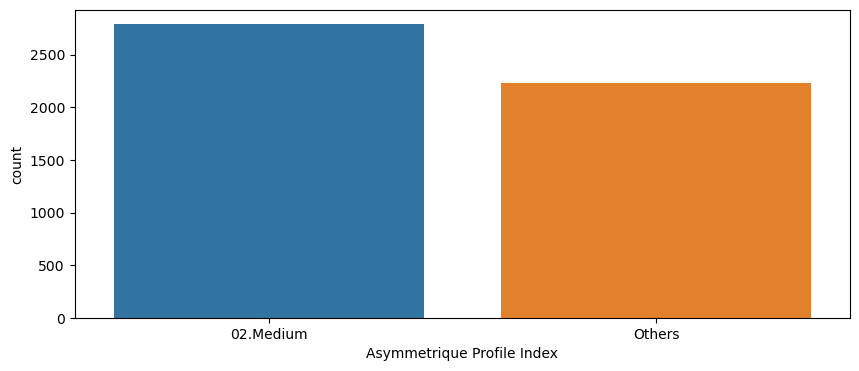

In [38]:
# visualizing the spread of data in 'Asymmetrique Profile Index' column

plt.figure(figsize=(10,4))
order=data['Asymmetrique Profile Index'].value_counts().index
sns.countplot(x='Asymmetrique Profile Index', data=data, order=order)

plt.show()

In [39]:
def group_low_value_counts(data, column_name, threshold=1000):
    """
    Group low-value counts in a column into an 'Others' category.

    Parameters:
        df (pandas DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column to process.
        threshold (int): The threshold below which data will be grouped into 'Others'.
                         Defaults to 100.

    Returns:
        pandas DataFrame: The updated DataFrame with 'Others' category.
    """
    # Count the occurrences of each value in the column
    value_counts = data[column_name].value_counts()

    # Identify values with counts below the threshold
    low_value_counts = value_counts[value_counts < threshold].index

    # Replace those values with 'Others'
    data.loc[data[column_name].isin(low_value_counts), column_name] = 'Others'

    return data

# Example usage:
# Assuming your DataFrame is called 'data' and the column to process is 'category_column'
data = group_low_value_counts(data, 'Asymmetrique Activity Index', threshold=1000)

In [40]:
# 'Asymmetrique Activity Index' is a categorial variable with 2 levels

data['Asymmetrique Activity Index'].value_counts()

02.Medium    3839
Others       1183
Name: Asymmetrique Activity Index, dtype: int64

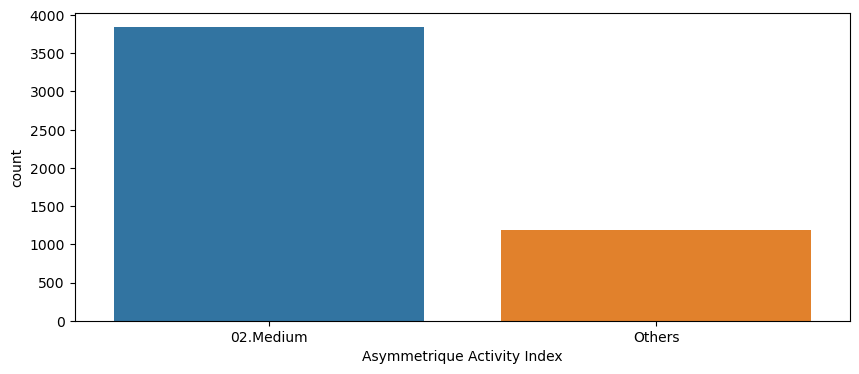

In [41]:
# visualizing the spread of data in 'Asymmetrique Activity Index' column

plt.figure(figsize=(10,4))
order=data['Asymmetrique Activity Index'].value_counts().index
sns.countplot(x='Asymmetrique Activity Index', data=data, order=order)

plt.show()

In [42]:
def group_low_value_counts(data, column_name, threshold=250):
    """
    Group low-value counts in a column into an 'Others' category.

    Parameters:
        df (pandas DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column to process.
        threshold (int): The threshold below which data will be grouped into 'Others'.
                         Defaults to 100.

    Returns:
        pandas DataFrame: The updated DataFrame with 'Others' category.
    """
    # Count the occurrences of each value in the column
    value_counts = data[column_name].value_counts()

    # Identify values with counts below the threshold
    low_value_counts = value_counts[value_counts < threshold].index

    # Replace those values with 'Others'
    data.loc[data[column_name].isin(low_value_counts), column_name] = 'Others'

    return data

# Example usage:
# Assuming your DataFrame is called 'data' and the column to process is 'category_column'
data = group_low_value_counts(data, 'Asymmetrique Activity Score', threshold=250)


In [43]:
# 'Asymmetrique Activity Score' is a categorial variable with 6 levels

data['Asymmetrique Activity Score'].value_counts()

14.0      1771
15.0      1293
13.0       775
16.0       467
Others     367
17.0       349
Name: Asymmetrique Activity Score, dtype: int64

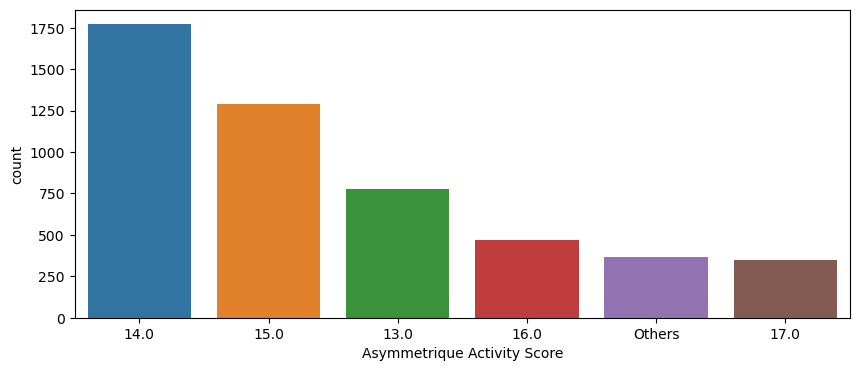

In [44]:
# visualizing the spread of data in 'Asymmetrique Activity Score' column

plt.figure(figsize=(10,4))
order=data['Asymmetrique Activity Score'].value_counts().index
sns.countplot(x='Asymmetrique Activity Score', data=data, order=order)

plt.show()

In [45]:
def group_low_value_counts(data, column_name, threshold=250):
    """
    Group low-value counts in a column into an 'Others' category.

    Parameters:
        df (pandas DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column to process.
        threshold (int): The threshold below which data will be grouped into 'Others'.
                         Defaults to 100.

    Returns:
        pandas DataFrame: The updated DataFrame with 'Others' category.
    """
    # Count the occurrences of each value in the column
    value_counts = data[column_name].value_counts()

    # Identify values with counts below the threshold
    low_value_counts = value_counts[value_counts < threshold].index

    # Replace those values with 'Others'
    data.loc[data[column_name].isin(low_value_counts), column_name] = 'Others'

    return data

# Example usage:
# Assuming your DataFrame is called 'data' and the column to process is 'category_column'
data = group_low_value_counts(data, 'Asymmetrique Profile Score', threshold=250)


In [46]:
# 'Asymmetrique Profile Score' is a categorial variable with 6 levels

data['Asymmetrique Profile Score'].value_counts()

15.0      1759
18.0      1071
Others     706
16.0       599
17.0       579
20.0       308
Name: Asymmetrique Profile Score, dtype: int64

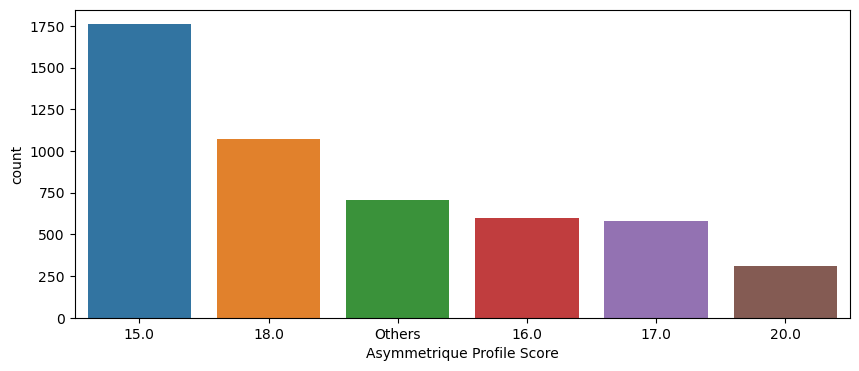

In [47]:
# visualizing the spread of data in 'Asymmetrique Profile Score' column

plt.figure(figsize=(10,4))
order=data['Asymmetrique Profile Score'].value_counts().index
sns.countplot(x='Asymmetrique Profile Score', data=data, order=order)

plt.show()

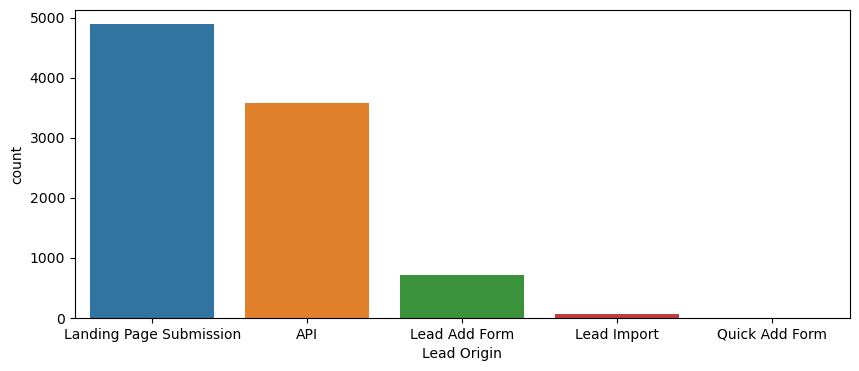

In [48]:
# visualizing the spread of data in 'Lead Origin' column

plt.figure(figsize=(10,4))
order=data['Lead Origin'].value_counts().index
sns.countplot(x='Lead Origin', data=data, order=order)

plt.show()

In [49]:
# 'Do Not Email' is a categorial variable with 2 levels

data['Do Not Email'].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

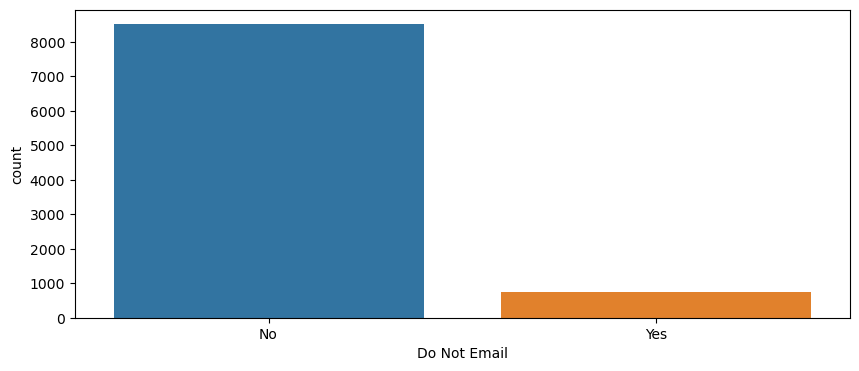

In [50]:
# visualizing the spread of data in 'Do Now Email' column

plt.figure(figsize=(10,4))
order=data['Do Not Email'].value_counts().index
sns.countplot(x='Do Not Email', data=data, order=order)

plt.show()

In [51]:
# 'Do Not Call' is a categorial variable with 2 levels

data['Do Not Call'].value_counts()

No     9238
Yes       2
Name: Do Not Call, dtype: int64

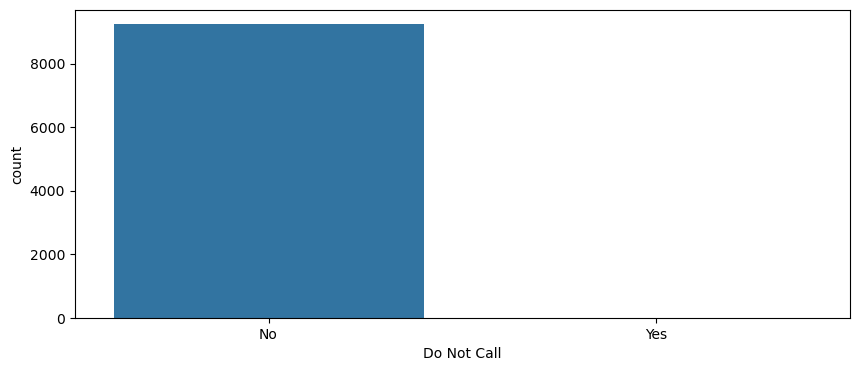

In [52]:
# visualizing the spread of data in 'Do Now Call' column

plt.figure(figsize=(10,4))
order=data['Do Not Call'].value_counts().index
sns.countplot(x='Do Not Call', data=data, order=order)

plt.show()

In [53]:
# 'Converted' is a categorial variable with 2 levels

data['Converted'].value_counts()

0    5679
1    3561
Name: Converted, dtype: int64

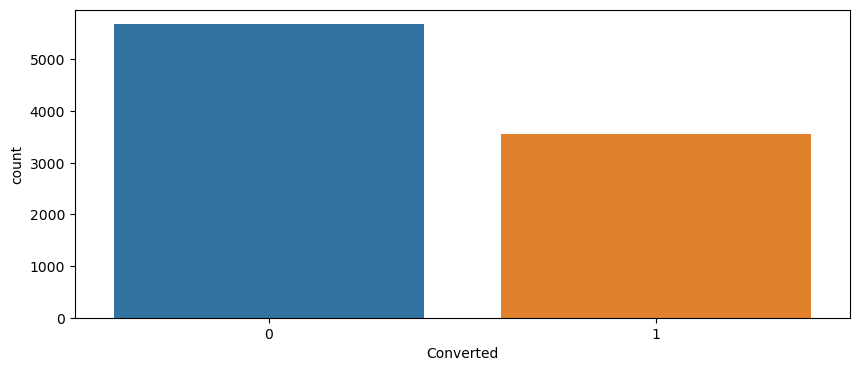

In [54]:
# visualizing the spread of data in 'Converted' column

plt.figure(figsize=(10,4))
order=data['Converted'].value_counts().index
sns.countplot(x='Converted', data=data, order=order)

plt.show()

In [55]:
# 'Search' is a categorial variable with 2 levels

data['Search'].value_counts()

No     9226
Yes      14
Name: Search, dtype: int64

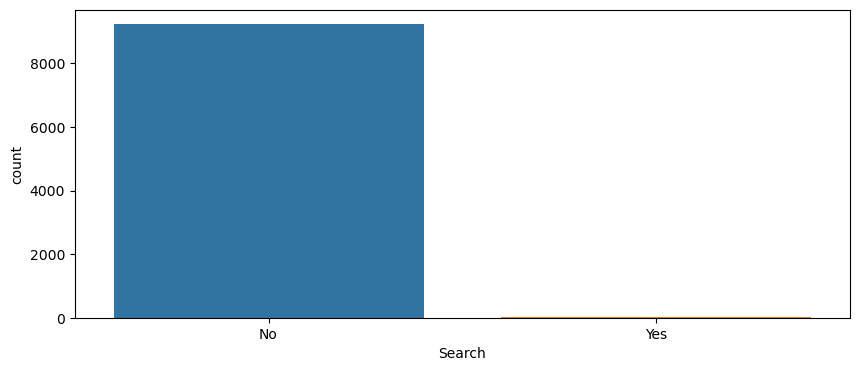

In [56]:
# visualizing the spread of data in 'Search' column

plt.figure(figsize=(10,4))
order=data['Search'].value_counts().index
sns.countplot(x='Search', data=data, order=order)

plt.show()

In [57]:
# 'Magazine' is a categorial variable with 1 levels

data['Magazine'].value_counts()

No    9240
Name: Magazine, dtype: int64

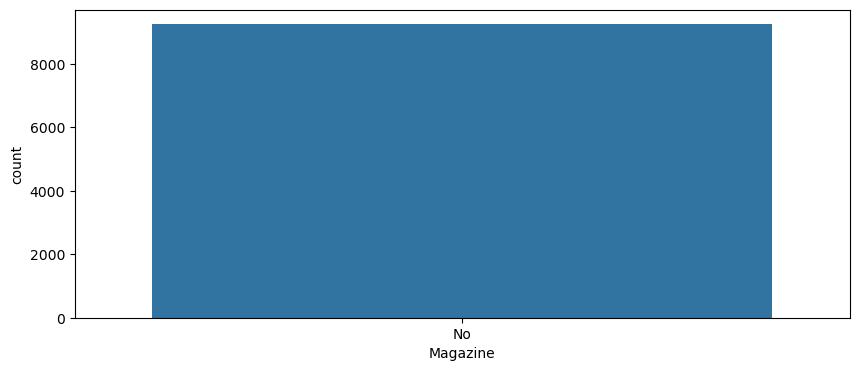

In [58]:
# visualizing the spread of data in 'Magazine' column

plt.figure(figsize=(10,4))
order=data['Magazine'].value_counts().index
sns.countplot(x='Magazine', data=data, order=order)

plt.show()

In [59]:
# 'Newspaper Article' is a categorial variable with 2 levels

data['Newspaper Article'].value_counts()

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

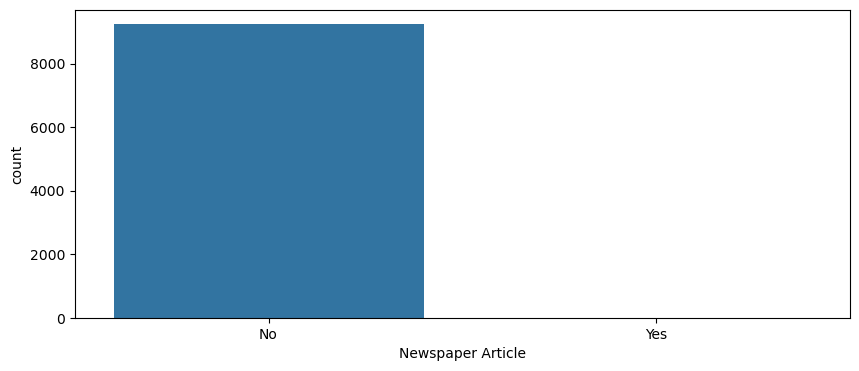

In [60]:
# visualizing the spread of data in 'Newspaper Article' column

plt.figure(figsize=(10,4))
order=data['Newspaper Article'].value_counts().index
sns.countplot(x='Newspaper Article', data=data, order=order)

plt.show()

In [61]:
# 'X Education Forums' is a categorial variable with 2 levels

data['X Education Forums'].value_counts()

No     9239
Yes       1
Name: X Education Forums, dtype: int64

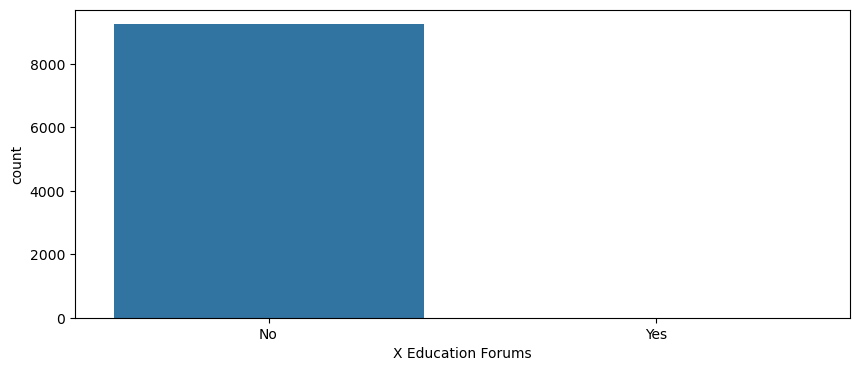

In [62]:
# visualizing the spread of data in 'X Education Forums' column

plt.figure(figsize=(10,4))
order=data['X Education Forums'].value_counts().index
sns.countplot(x='X Education Forums', data=data, order=order)

plt.show()

In [63]:
# 'Newspaper' is a categorial variable with 2 levels

data['Newspaper'].value_counts()

No     9239
Yes       1
Name: Newspaper, dtype: int64

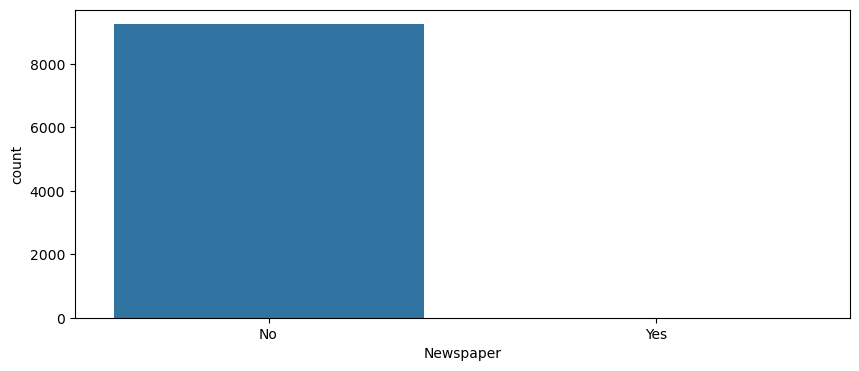

In [64]:
# visualizing the spread of data in 'Newspaper' column

plt.figure(figsize=(10,4))
order=data['Newspaper'].value_counts().index
sns.countplot(x='Newspaper', data=data, order=order)

plt.show()

In [65]:
# 'Digital Advertisement' is a categorial variable with 2 levels

data['Digital Advertisement'].value_counts()

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

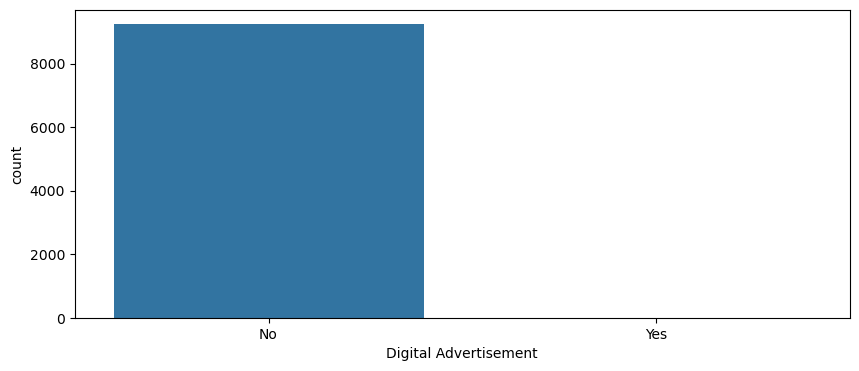

In [66]:
# visualizing the spread of data in 'Digital Advertisement' column

plt.figure(figsize=(10,4))
order=data['Digital Advertisement'].value_counts().index
sns.countplot(x='Digital Advertisement', data=data, order=order)

plt.show()

In [67]:
# 'Through Recommendations' is a categorial variable with 2 levels

data['Through Recommendations'].value_counts()

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

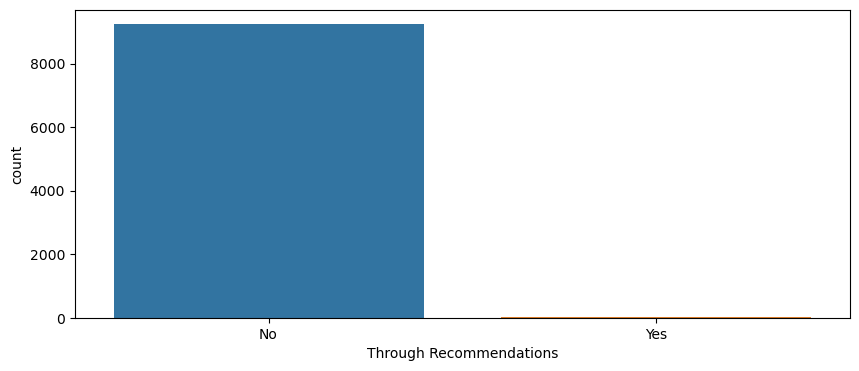

In [68]:
# visualizing the spread of data in 'Through Recommendations' column

plt.figure(figsize=(10,4))
order=data['Through Recommendations'].value_counts().index
sns.countplot(x='Through Recommendations', data=data, order=order)

plt.show()

In [69]:
# 'Receive More Updates About Our Courses' is a categorial variable with 1 levels

data['Receive More Updates About Our Courses'].value_counts()

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

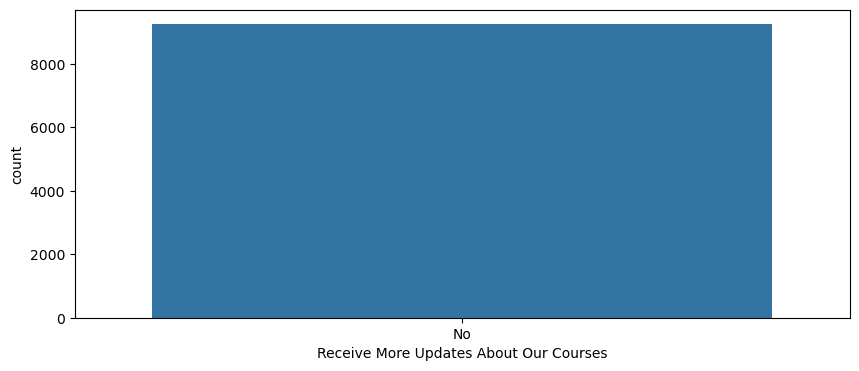

In [70]:
# visualizing the spread of data in 'Receive More Updates About Our Courses' column

plt.figure(figsize=(10,4))
order=data['Receive More Updates About Our Courses'].value_counts().index
sns.countplot(x='Receive More Updates About Our Courses', data=data, order=order)

plt.show()

In [71]:
# 'Update me on Supply Chain Content' is a categorial variable with 1 levels

data['Update me on Supply Chain Content'].value_counts()

No    9240
Name: Update me on Supply Chain Content, dtype: int64

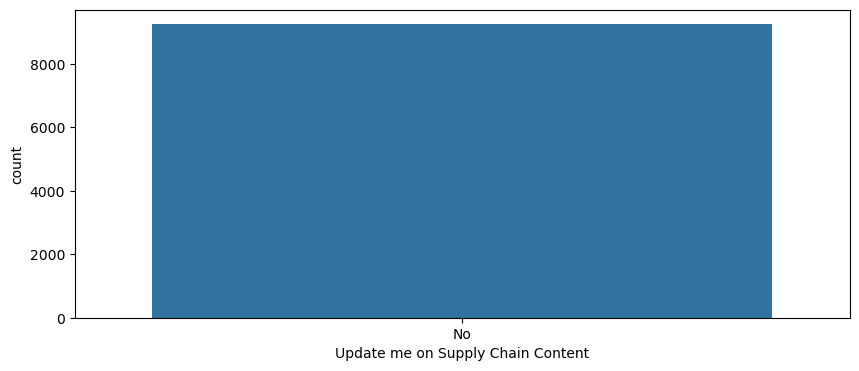

In [72]:
# visualizing the spread of data in 'Update me on Supply Chain Content' column

plt.figure(figsize=(10,4))
order=data['Update me on Supply Chain Content'].value_counts().index
sns.countplot(x='Update me on Supply Chain Content', data=data, order=order)

plt.show()

In [73]:
# 'Get updates on DM Content' is a categorial variable with 1 levels

data['Get updates on DM Content'].value_counts()

No    9240
Name: Get updates on DM Content, dtype: int64

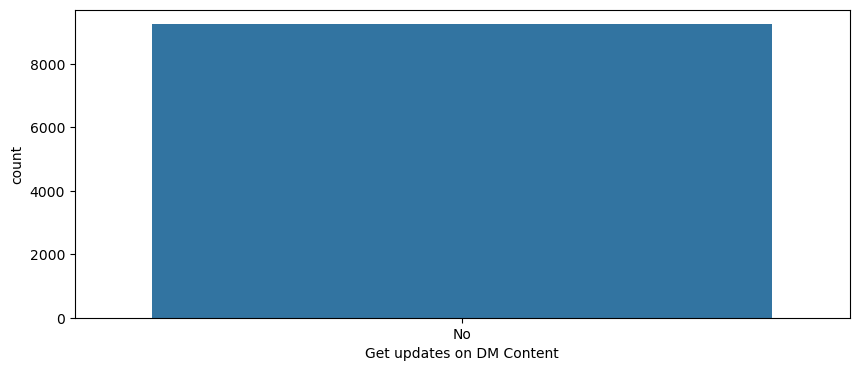

In [74]:
# visualizing the spread of data in 'Get updates on DM Content' column

plt.figure(figsize=(10,4))
order=data['Get updates on DM Content'].value_counts().index
sns.countplot(x='Get updates on DM Content', data=data, order=order)

plt.show()

In [75]:
# 'I agree to pay the amount through cheque' is a categorial variable with 1 levels

data['I agree to pay the amount through cheque'].value_counts()

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

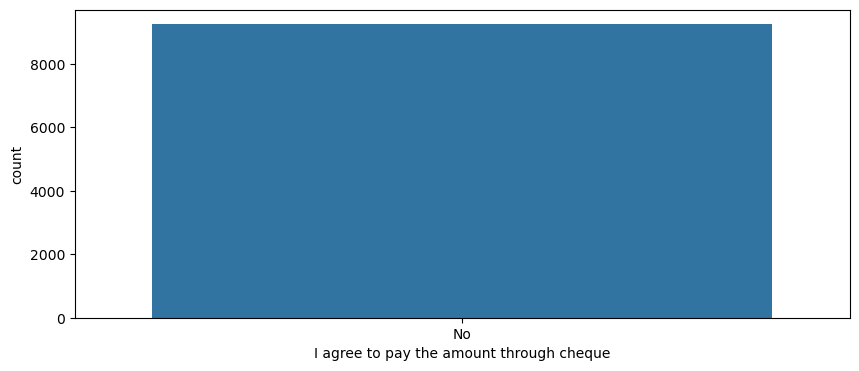

In [76]:
# visualizing the spread of data in 'I agree to pay the amount through cheque' column

plt.figure(figsize=(10,4))
order=data['I agree to pay the amount through cheque'].value_counts().index
sns.countplot(x='I agree to pay the amount through cheque', data=data, order=order)

plt.show()

In [77]:
# 'A free copy of Mastering The Interview' is a categorial variable with 2 levels

data['A free copy of Mastering The Interview'].value_counts()

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

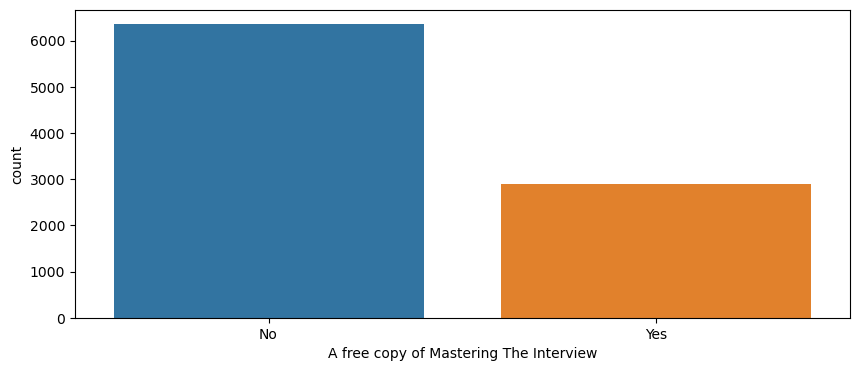

In [78]:
# visualizing the spread of data in 'A free copy of Mastering The Interview' column

plt.figure(figsize=(10,4))
order=data['A free copy of Mastering The Interview'].value_counts().index
sns.countplot(x='A free copy of Mastering The Interview', data=data, order=order)

plt.show()

In [79]:
# 'A free copy of Mastering The Interview' is a categorial variable with 2 levels

data['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [80]:
def group_low_value_counts(data, column_name, threshold=10):
    """
    Group low-value counts in a column into an 'Others' category.

    Parameters:
        df (pandas DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column to process.
        threshold (int): The threshold below which data will be grouped into 'Others'.
                         Defaults to 100.

    Returns:
        pandas DataFrame: The updated DataFrame with 'Others' category.
    """
    # Count the occurrences of each value in the column
    value_counts = data[column_name].value_counts()

    # Identify values with counts below the threshold
    low_value_counts = value_counts[value_counts < threshold].index

    # Replace those values with 'Others'
    data.loc[data[column_name].isin(low_value_counts), column_name] = 'Others'

    return data

# Example usage:
# Assuming your DataFrame is called 'data' and the column to process is 'category_column'
data = group_low_value_counts(data, 'Last Activity', threshold=10)


In [81]:
# 'A free copy of Mastering The Interview' is a categorial variable with 2 levels

data['Last Activity'].value_counts()

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Form Submitted on Website     116
Unreachable                    93
Unsubscribed                   61
Had a Phone Conversation       30
Others                         21
Name: Last Activity, dtype: int64

In [82]:
lis_la = ['Unreachable','Unsubscribed','Had a Phone Conversation','View in browser link Clicked','Approached upfront','Email Marked Spam','Email Received','Others','Resubscribed to emails','Visited Booth in Tradeshow']

data['Last Activity'] = data['Last Activity'].apply(lambda x : 'Other_la' if x in lis_la else x)

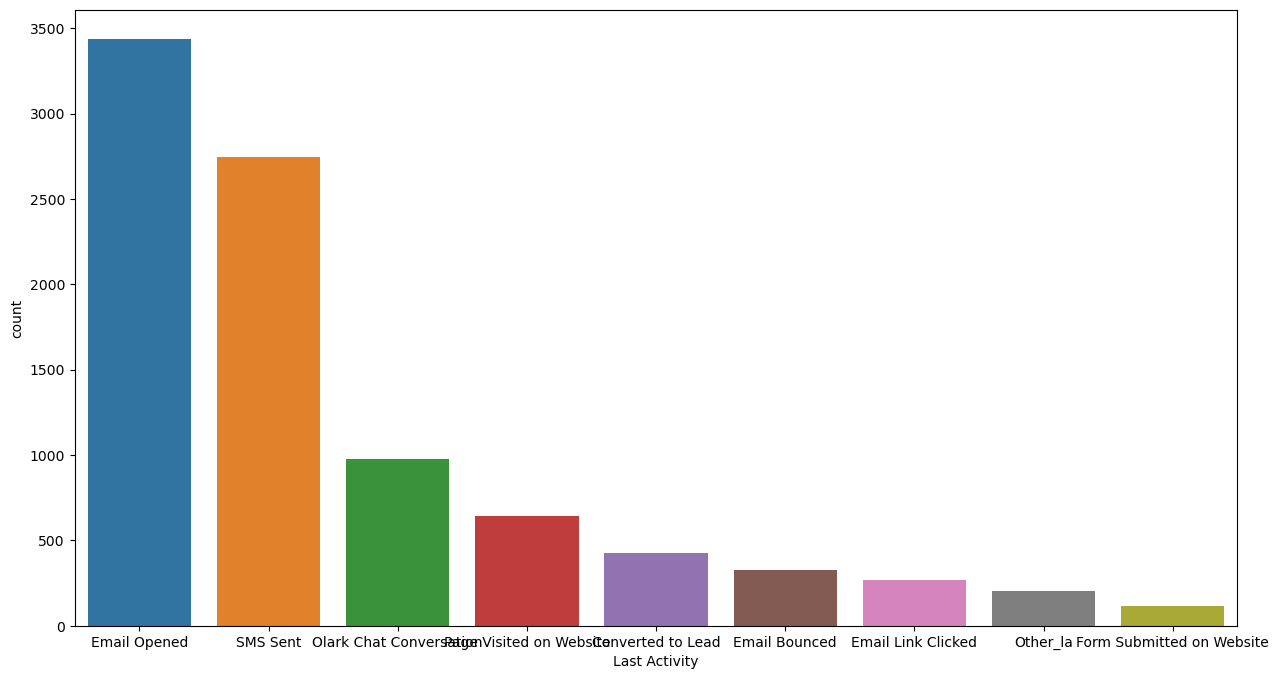

In [83]:
# visualizing the spread of data in 'Last Notable Activity' column

plt.figure(figsize=(15,8))
order=data['Last Activity'].value_counts().index
sns.countplot(x='Last Activity', data=data, order=order)

plt.show()

In [84]:
# 'A free copy of Mastering The Interview' is a categorial variable with 2 levels

data['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [85]:
lis_na = ['Email Bounced','Unsubscribed','Unreachable','Had a Phone Conversation','Email Marked Spam','Resubscribed to emails','Email Received','Form Submitted on Website','View in browser link Clicked','Approached upfront']

data['Last Notable Activity'] = data['Last Notable Activity'].apply(lambda x : 'Other_na' if x in lis_na else x)

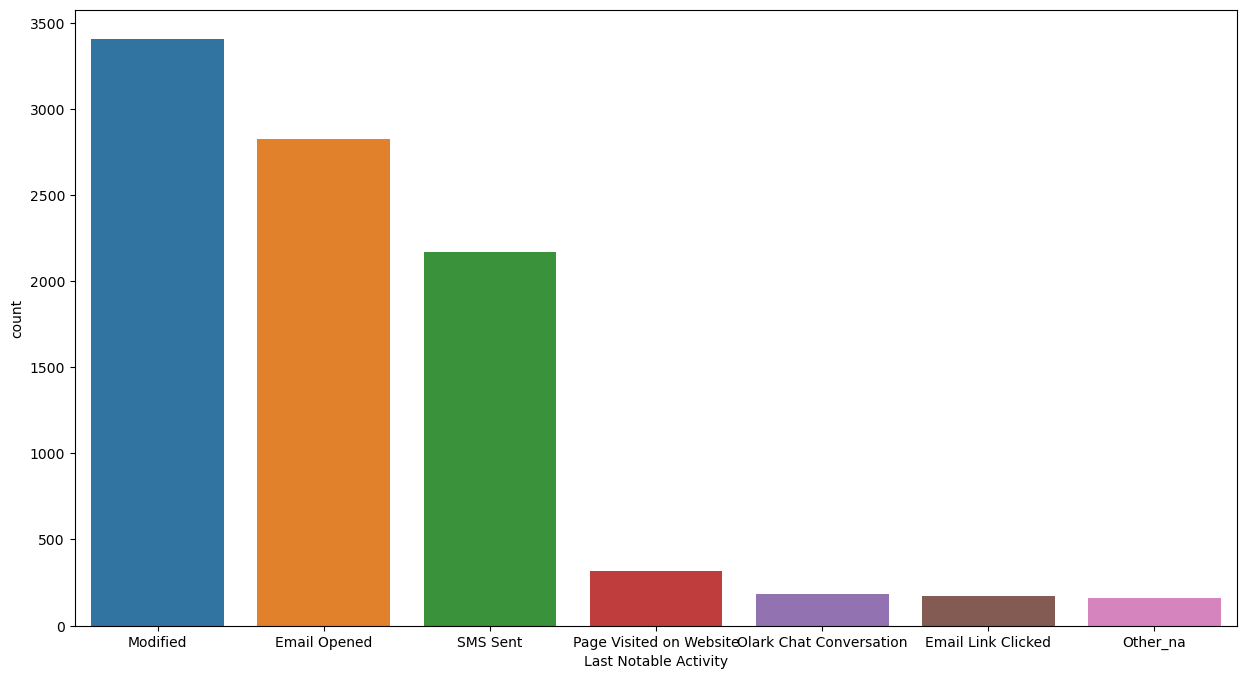

In [86]:
# visualizing the spread of data in 'Last Notable Activity' column

plt.figure(figsize=(15,8))
order=data['Last Notable Activity'].value_counts().index
sns.countplot(x='Last Notable Activity', data=data, order=order)

plt.show()

In [87]:
def group_low_value_counts(data, column_name, threshold=10):
    """
    Group low-value counts in a column into an 'Others' category.

    Parameters:
        df (pandas DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column to process.
        threshold (int): The threshold below which data will be grouped into 'Others'.
                         Defaults to 100.

    Returns:
        pandas DataFrame: The updated DataFrame with 'Others' category.
    """
    # Count the occurrences of each value in the column
    value_counts = data[column_name].value_counts()

    # Identify values with counts below the threshold
    low_value_counts = value_counts[value_counts < threshold].index

    # Replace those values with 'Others'
    data.loc[data[column_name].isin(low_value_counts), column_name] = 'Others'

    return data

# Example usage:
# Assuming your DataFrame is called 'data' and the column to process is 'category_column'
data = group_low_value_counts(data, 'Last Notable Activity', threshold=10)


In [88]:
# 'A free copy of Mastering The Interview' is a categorial variable with 2 levels

data['Last Notable Activity'].value_counts()

Modified                   3407
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other_na                    160
Name: Last Notable Activity, dtype: int64

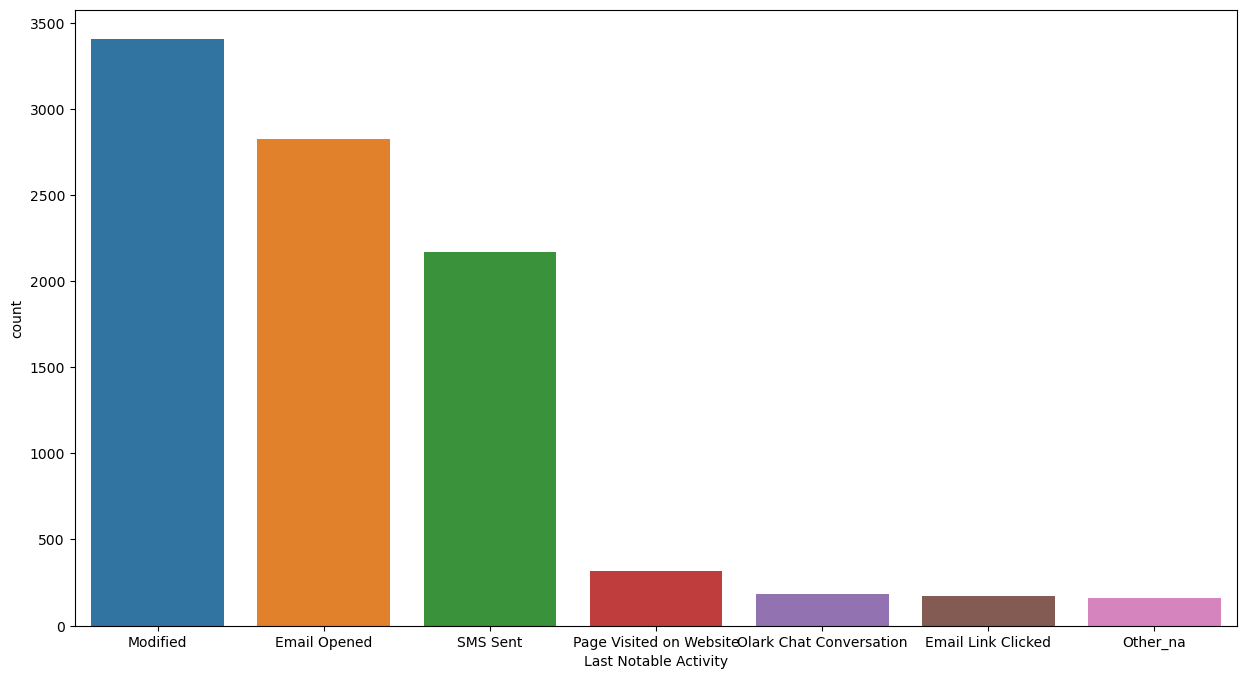

In [89]:
# visualizing the spread of data in 'Last Notable Activity' column

plt.figure(figsize=(15,8))
order=data['Last Notable Activity'].value_counts().index
sns.countplot(x='Last Notable Activity', data=data, order=order)

plt.show()

In [90]:
# checking names of columns

data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [91]:
data.Specialization.value_counts()

Select                               3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [92]:
# rounding the percentage of null value in a column to 2
data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                      0
How did you hear about X Education                  0
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

### Dropping columns based of high skewness and null values

In [93]:
data.drop('I agree to pay the amount through cheque', axis =1, inplace = True)

In [94]:
data.drop('Receive More Updates About Our Courses', axis =1, inplace = True)

In [95]:
data.drop('Through Recommendations', axis =1, inplace = True)

In [96]:
data.drop('Tags', axis =1, inplace = True)

In [97]:
data.drop('Lead Quality', axis =1, inplace = True)

In [98]:
data.drop('Do Not Call', axis =1, inplace = True)

In [99]:
data.drop('Update me on Supply Chain Content', axis =1, inplace = True)

In [100]:
data.drop('Asymmetrique Profile Score', axis =1, inplace = True)

In [101]:
data.drop('Asymmetrique Activity Score', axis =1, inplace = True)

In [102]:
data.drop('Search', axis =1, inplace = True)

In [103]:
data.drop('Magazine', axis =1, inplace = True)

In [104]:
data.drop('X Education Forums', axis =1, inplace = True)

In [105]:
data.drop('Newspaper Article', axis =1, inplace = True)

In [106]:
data.drop('Newspaper', axis =1, inplace = True)

In [107]:
data.drop('Digital Advertisement', axis =1, inplace = True)

In [108]:
data.drop('Get updates on DM Content', axis =1, inplace = True)

In [109]:
data.drop('Country', axis =1, inplace = True)

In [110]:
data.drop('What is your current occupation', axis =1, inplace = True)

In [111]:
data.drop('Asymmetrique Activity Index', axis =1, inplace = True)

In [112]:
data.drop('Asymmetrique Profile Index', axis =1, inplace = True)

In [113]:
data.drop('What matters most to you in choosing a course', axis =1, inplace = True)

In [114]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Select,Select,Select,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Select,Select,Select,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Select,Potential Lead,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Other_la,Media and Advertising,Word Of Mouth,Select,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Other_ed,Select,Mumbai,No,Modified


In [115]:
data.shape

(9240, 16)

In [116]:
# Checking for null values

data.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                36
Do Not Email                                0
Converted                                   0
TotalVisits                               137
Total Time Spent on Website                 0
Page Views Per Visit                      137
Last Activity                             103
Specialization                              0
How did you hear about X Education          0
Lead Profile                                0
City                                        0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [117]:
# Dropping null rows

data.dropna(axis=0,inplace=True)

In [118]:
# checking if the null values are removed

data.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
How did you hear about X Education        0
Lead Profile                              0
City                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [119]:
# cheking rows with null values

rows_with_null = data.isnull().any(axis=1).sum()
rows_with_null

0

In [120]:
# calculating total number of rows in our dataset after dropping columns and null values

rows_after_dropping = len(data)

In [121]:
# calculating the percent of rows remaining ater dropping columns and null values

percentage_after_dropping = (rows_after_dropping / total_rows_before) * 100
percentage_after_dropping

98.2034632034632

In [122]:
#calculating number of rows remaining

total_rows_after = len(data)
total_rows_after

9074

In [123]:
# checking names of columns

data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'How did you hear about X Education', 'Lead Profile',
       'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [124]:
data

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.00,Page Visited on Website,Select,Select,Select,Select,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.50,Email Opened,Select,Select,Select,Select,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.00,Email Opened,Business Administration,Select,Potential Lead,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.00,Other_la,Media and Advertising,Word Of Mouth,Select,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.00,Converted to Lead,Select,Other_ed,Select,Mumbai,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,1,8.0,1845,2.67,Other_la,IT Projects Management,Select,Potential Lead,Mumbai,No,Other_na
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,0,2.0,238,2.00,SMS Sent,Media and Advertising,Select,Potential Lead,Mumbai,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,0,2.0,199,2.00,SMS Sent,Business Administration,Select,Potential Lead,Mumbai,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,1,3.0,499,3.00,SMS Sent,Human Resource Management,Online Search,Select,Other Metro Cities,No,SMS Sent


In [125]:
data.describe(include='all')

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
count,9074,9074.000000,9074,9074,9074,9074.000000,9074.000000,9074.000000,9074.000000,9074,9074,9074,9074,9074,9074,9074
unique,9074,NaN,4,8,2,NaN,NaN,NaN,NaN,9,19,6,5,7,2,7
top,7927b2df-8bba-4d29-b9a2-b6e0beafe620,NaN,Landing Page Submission,Google,No,NaN,NaN,NaN,NaN,Email Opened,Select,Select,Select,Select,No,Modified
freq,1,NaN,4885,2868,8358,NaN,NaN,NaN,NaN,3432,3282,7086,6757,3575,6186,3267
mean,NaN,617032.619352,NaN,NaN,NaN,0.378554,3.456028,482.887481,2.370151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,23348.029512,NaN,NaN,NaN,0.485053,4.858802,545.256560,2.160871,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,579533.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,596406.000000,NaN,NaN,NaN,0.000000,1.000000,11.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,615278.500000,NaN,NaN,NaN,0.000000,3.000000,246.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,637176.500000,NaN,NaN,NaN,1.000000,5.000000,922.750000,3.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9074 non-null   object 
 1   Lead Number                             9074 non-null   int64  
 2   Lead Origin                             9074 non-null   object 
 3   Lead Source                             9074 non-null   object 
 4   Do Not Email                            9074 non-null   object 
 5   Converted                               9074 non-null   int64  
 6   TotalVisits                             9074 non-null   float64
 7   Total Time Spent on Website             9074 non-null   int64  
 8   Page Views Per Visit                    9074 non-null   float64
 9   Last Activity                           9074 non-null   object 
 10  Specialization                          9074 non-null   obje

### Renaming columns 

In [127]:
data = data.rename(columns={'Lead Origin': 'Lead_Origin'})

In [128]:
data = data.rename(columns={'Lead Source': 'Lead_Source'})

In [129]:
data = data.rename(columns={'Last Activity': 'Last_Activity'})

In [130]:
data = data.rename(columns={'A free copy of Mastering The Interview': 'A_Free_Copy_of_Mastering_The_Interview'})

In [131]:
data = data.rename(columns={'Last Notable Activity': 'Last_Notable_Activity'})

In [132]:
data = data.rename(columns={'Do Not Email': 'Do_Not_Email'})

In [133]:
data = data.rename(columns={'How did you hear about X Education': 'How_did_you_hear_about_X_Education'})

In [134]:
data = data.rename(columns={'Lead Profile': 'Lead_Profile'})

# Dummy Variables

In [135]:
# creating a function to convert a certain text to another

def Do_Not_Email(x):
    if x == 'Yes':
        return 'do_not_email_yes'
    else:
        return 'do_not_email_no'

In [136]:
# applying the created function to the existing column

data['Do_Not_Email'] = data['Do_Not_Email'].apply(Do_Not_Email)

In [137]:
Do_Not_Email_dummy = pd.get_dummies(data.Do_Not_Email,drop_first = True)
Do_Not_Email_dummy.head()

,do_not_email_yes
0,0
1,0
2,0
3,0
4,0


In [138]:
# creating a function to convert a certain text to another

def edu (x):
    if x == 'Student of SomeSchool':
        return 'edu_someschool'
    else:
        return x

In [139]:
# applying the created function to the existing column

data['How_did_you_hear_about_X_Education'] = data['How_did_you_hear_about_X_Education'].apply(edu)

In [140]:
How_did_you_hear_about_X_Education_dummy = pd.get_dummies(data.How_did_you_hear_about_X_Education,drop_first = True)
How_did_you_hear_about_X_Education_dummy.head()

,Online Search,Other_ed,Select,Word Of Mouth,edu_someschool
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,1,0,0,0


In [141]:
# creating a function to convert a certain text to another

def lp(x):
    if x == 'Select':
        return 'select_lp'
    elif x == 'Student of SomeSchool':
        return 'lp_someschool'
    else:
        return x

In [142]:
# applying the created function to the existing column

data['Lead_Profile'] = data['Lead_Profile'].apply(lp)

In [143]:
Lead_Profile_dummy = pd.get_dummies(data.Lead_Profile, drop_first = True)
Lead_Profile_dummy.head()

,Other_lp,Potential Lead,lp_someschool,select_lp
0,0,0,0,1
1,0,0,0,1
2,0,1,0,0
3,0,0,0,1
4,0,0,0,1


In [144]:
# creating a function to convert a certain text to another

def specs(x):
    if x == 'Select':
        return 'select_specs'
    else:
        return x

In [145]:
# applying the created function to the existing column

data['Specialization'] = data['Specialization'].apply(specs)

In [146]:
Specialization_dummy = pd.get_dummies(data.Specialization, drop_first = True)
Specialization_dummy.head()

,Business Administration,E-Business,E-COMMERCE,Finance Management,Healthcare Management,Hospitality Management,Human Resource Management,IT Projects Management,International Business,Marketing Management,Media and Advertising,Operations Management,Retail Management,Rural and Agribusiness,Services Excellence,Supply Chain Management,Travel and Tourism,select_specs
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [147]:
# creating a function to convert a certain text to another

def city (x):
    if  x == 'Select':
        return 'select_city'
    else:
        return x

In [148]:
# applying the created function to the existing column

data['City'] = data['City'].apply(city)

In [149]:
City_dummy = pd.get_dummies(data.City, drop_first = True)
City_dummy.head()

,Other Cities,Other Cities of Maharashtra,Other Metro Cities,Thane & Outskirts,Tier II Cities,select_city
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [150]:
Lead_Origin_dummy = pd.get_dummies(data.Lead_Origin, drop_first = True)
Lead_Origin_dummy.head()

,Landing Page Submission,Lead Add Form,Lead Import
0,0,0,0
1,0,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [151]:
Lead_Source_dummy = pd.get_dummies(data.Lead_Source,drop_first = True)
Lead_Source_dummy.head()

,Google,Olark Chat,Organic Search,Other_ls,Reference,Referral Sites,Welingak Website
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0


In [152]:
# creating a function to convert a certain text to another

def sms(x):
    if x == 'SMS Sent':
        return 'sms_sent_la'
    if x == 'Olark Chat Conversation':
        return 'Olark_Chat_Conversation_la'
    if x == 'Email Opened':
        return 'Email_Opened_la'
    else:
        return x

In [153]:
# applying the created function to the existing column

data['Last_Activity'] = data['Last_Activity'].apply(sms)

In [154]:
Last_Activity_dummy = pd.get_dummies(data.Last_Activity,drop_first = True)
Last_Activity_dummy.head()

,Email Bounced,Email Link Clicked,Email_Opened_la,Form Submitted on Website,Olark_Chat_Conversation_la,Other_la,Page Visited on Website,sms_sent_la
0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0


In [155]:
# creating a function to convert a certain text to another

def interview(x):
    if x == 'Yes':
        return 'yes_mastering_the_interview_copy'
    else:
        return 'no_mastering_the_interview_copy'

In [156]:
# applying the created function to the existing column

data['A_Free_Copy_of_Mastering_The_Interview'] = data['A_Free_Copy_of_Mastering_The_Interview'].apply(interview)

In [157]:
A_Free_Copy_of_Mastering_The_Interview_dummy = pd.get_dummies(data.A_Free_Copy_of_Mastering_The_Interview,drop_first = True)
A_Free_Copy_of_Mastering_The_Interview_dummy.head()

,yes_mastering_the_interview_copy
0,0
1,0
2,1
3,0
4,0


In [158]:
# creating a function to convert a certain text to another

def smss(x):
    if x == 'SMS Sent':
        return 'sms_sent_lna'
    if x == 'Olark Chat Conversation':
        return 'Olark_Chat_Conversation_lna'
    if x == 'Email Opened':
        return 'Email_Opened_lna'
    if x == 'Page Visited on Website':
        return 'Page_Visited_on_Website_lna'
    else:
        return x

In [159]:
# applying the created function to the existing column

data['Last_Notable_Activity'] = data['Last_Notable_Activity'].apply(smss)

In [160]:
Last_Notable_Activity_dummy = pd.get_dummies(data.Last_Notable_Activity,drop_first = True)
Last_Notable_Activity_dummy.head()

,Email_Opened_lna,Modified,Olark_Chat_Conversation_lna,Other_na,Page_Visited_on_Website_lna,sms_sent_lna
0,0,1,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0


### Creating a datafram for numerical columns

In [161]:
Prospect_ID = data['Prospect ID']

In [162]:
Lead_Number = data['Lead Number']

In [163]:
Total_Time_Spent_on_Website = data['Total Time Spent on Website']

In [164]:
TotalVisits = data['TotalVisits']    

In [165]:
Page_Views_Per_Visit = data['Page Views Per Visit']

In [166]:
Converted = data['Converted']

# Concating all dataframes of dummy variables and numerical columns

In [167]:
final = pd.concat([Prospect_ID, Lead_Number, Total_Time_Spent_on_Website, Converted, How_did_you_hear_about_X_Education_dummy,City_dummy, Lead_Profile_dummy, Specialization_dummy, Lead_Origin_dummy, Do_Not_Email_dummy, Lead_Source_dummy, TotalVisits, Page_Views_Per_Visit, Last_Activity_dummy, A_Free_Copy_of_Mastering_The_Interview_dummy, Last_Notable_Activity_dummy],axis =1)
final.head()

,Prospect ID,Lead Number,Total Time Spent on Website,Converted,Online Search,Other_ed,Select,Word Of Mouth,edu_someschool,Other Cities,...,Other_la,Page Visited on Website,sms_sent_la,yes_mastering_the_interview_copy,Email_Opened_lna,Modified,Olark_Chat_Conversation_lna,Other_na,Page_Visited_on_Website_lna,sms_sent_lna
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,674,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1532,1,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,305,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,1428,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


# Train and Test

In [168]:
# imporitng relevant libraries

import sklearn
from sklearn.model_selection import train_test_split

In [169]:
# dividing the data into train and test split

final_train, final_test = train_test_split(final, train_size = 0.7, random_state = 100)
print(final_train.shape)
print(final_test.shape)

(6351, 65)
(2723, 65)


# Performing Rescaling of numeric values

In [170]:
#importing relevant packages and Instiating scaler object 

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [171]:
# creating a list of numeric variables 

numeric = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

In [172]:
# fitting the scaler on the dataframe 

final_train[numeric] = scaler.fit_transform(final_train[numeric])

In [173]:
final_train.head()

,Prospect ID,Lead Number,Total Time Spent on Website,Converted,Online Search,Other_ed,Select,Word Of Mouth,edu_someschool,Other Cities,...,Other_la,Page Visited on Website,sms_sent_la,yes_mastering_the_interview_copy,Email_Opened_lna,Modified,Olark_Chat_Conversation_lna,Other_na,Page_Visited_on_Website_lna,sms_sent_lna
3009,42a4d521-df88-4b5a-b198-50594a407a2d,630949,0.178347,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1012,4594be86-3b2e-4b55-866b-5a4b05ffd0f6,649355,0.085355,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9226,c3bb1471-53d5-4244-b2e5-4bbb543835c1,579735,0.000000,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4750,9bce5fbc-8d57-4dc9-8f82-fd11d94d9969,614238,0.619946,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
7987,b0bfbc32-bd4a-4376-a829-5318bc0e9547,588625,0.711590,1,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [174]:
y = final['Converted']

In [175]:
y_train = final_train.pop('Converted')
x_train = final_train

In [176]:
y_train.head()

3009    0
1012    0
9226    0
4750    1
7987    1
Name: Converted, dtype: int64

In [177]:
x_train.head()

,Prospect ID,Lead Number,Total Time Spent on Website,Online Search,Other_ed,Select,Word Of Mouth,edu_someschool,Other Cities,Other Cities of Maharashtra,...,Other_la,Page Visited on Website,sms_sent_la,yes_mastering_the_interview_copy,Email_Opened_lna,Modified,Olark_Chat_Conversation_lna,Other_na,Page_Visited_on_Website_lna,sms_sent_lna
3009,42a4d521-df88-4b5a-b198-50594a407a2d,630949,0.178347,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1012,4594be86-3b2e-4b55-866b-5a4b05ffd0f6,649355,0.085355,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9226,c3bb1471-53d5-4244-b2e5-4bbb543835c1,579735,0.000000,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4750,9bce5fbc-8d57-4dc9-8f82-fd11d94d9969,614238,0.619946,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
7987,b0bfbc32-bd4a-4376-a829-5318bc0e9547,588625,0.711590,0,0,0,1,0,0,1,...,0,0,1,0,0,1,0,0,0,0


In [178]:
import sklearn
from sklearn.model_selection import train_test_split

In [179]:
x = final.drop(['Prospect ID','Lead Number','Converted'],axis = 1)

In [180]:
x.head()

,Total Time Spent on Website,Online Search,Other_ed,Select,Word Of Mouth,edu_someschool,Other Cities,Other Cities of Maharashtra,Other Metro Cities,Thane & Outskirts,...,Other_la,Page Visited on Website,sms_sent_la,yes_mastering_the_interview_copy,Email_Opened_lna,Modified,Olark_Chat_Conversation_lna,Other_na,Page_Visited_on_Website_lna,sms_sent_lna
0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,674,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1532,0,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
3,305,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,1428,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [181]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 365)

In [182]:
# calculating the conversion rate

conversion = sum(final['Converted'])/len(final['Converted'].index)
conversion

0.3785541106458012

###### We have a conversion rate of 37.86 percentage

# Building the First Model

In [183]:
# imporitng relevant libraries

import statsmodels.api as sm

In [184]:
model = sm.GLM(y_train, (sm.add_constant(x_train)), family = sm.families.Binomial())
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6288
Model Family:                Binomial   Df Model:                           62
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2427.9
Date:                Fri, 11 Aug 2023   Deviance:                       4855.8
Time:                        08:13:48   Pearson chi2:                 6.67e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4300
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -2.6432      0.641     -4.124      0.000      -3.899      -1.387
Total Time Spent on Website          0.0021    7.8e-05     26.599      0.000       0.002       0.002
Online Search                        0.2269      0.281      0.809      0.419      -0.323       0.777
Other_ed                             0.2563      0.303      0.846      0.398      -0.338       0.850
Select                               0.3513      0.296      1.187      0.235      -0.229       0.931
Word Of Mouth                        0.4426      0.306      1.447      0.148      -0.157       1.042
edu_someschool                       0.7124      0.315      2.261      0.024       0.095       1.330
Other Cities                         0.1153      0.148      0.782      0.434      -0.174       0.405
Other Cities of Maharashtra         -0.0172      0.171     -0.101      0.920      -0.353       0.319
Other Metro Cities                   0.0690      0.183      0.377      0.706      -0.289       0.427
Thane & Outskirts                    0.0501      0.139      0.360      0.719      -0.223       0.323
Tier II Cities                       0.6551      0.430      1.525      0.127      -0.187       1.497
select_city                         -0.0116      0.204     -0.057      0.955      -0.411       0.388
Other_lp                            22.6740    1.4e+04      0.002      0.999   -2.74e+04    2.74e+04
Potential Lead                       1.3492      0.168      8.021      0.000       1.020       1.679
lp_someschool                       -3.3319      0.642     -5.193      0.000      -4.589      -2.074
select_lp                           -0.7619      0.149     -5.098      0.000      -1.055      -0.469
Business Administration             -0.0589      0.258     -0.228      0.819      -0.564       0.446
E-Business                          -0.5503      0.488     -1.127      0.260      -1.508       0.407
E-COMMERCE                           0.3663      0.387      0.946      0.344      -0.392       1.125
Finance Management                  -0.0127      0.229     -0.056      0.956      -0.462       0.436
Healthcare Management                0.0002      0.342      0.001      1.000      -0.670       0.670
Hospitality Management              -0.5975      0.388     -1.539      0.124      -1.359       0.164
Human Resource Management            0.0209      0.233      0.090      0.929      -0.435       0.477
IT Projects Management               0.0625      0.272      0.230      0.818      -0.470       0.595
International Business              -0.4123      0.323     -1.278      0.201      -1.045       0.220
Marketing Management                 0.0908      0.233      0.390      0.697      -0.366       0.547
Media and Advertising               -0.2260      0.31

# RFE - Recursive Feature Elimination

### Using RFE to select 10 variables

In [185]:
# importing relevant libraries 

from sklearn.linear_model import LogisticRegression 
logreg = LogisticRegression()

In [186]:
# running Recursive Feature Elimination (RFE) 

from sklearn.feature_selection import RFE 
rfe = RFE(estimator=logreg, n_features_to_select = 10)

rfe = rfe.fit(x_train, y_train)

In [187]:
# making a list of 10 variables 

col = x_train.columns[rfe.support_]
col

Index(['Other_lp', 'Potential Lead', 'lp_someschool', 'select_specs',
       'Landing Page Submission', 'Lead Add Form', 'do_not_email_yes',
       'Welingak Website', 'Other_na', 'sms_sent_lna'],
      dtype='object')

In [188]:
final_df = x_train[col]

In [189]:
final_df.head()

,Other_lp,Potential Lead,lp_someschool,select_specs,Landing Page Submission,Lead Add Form,do_not_email_yes,Welingak Website,Other_na,sms_sent_lna
193,0,0,0,0,1,0,0,0,0,0
4293,0,0,0,1,0,0,0,0,0,0
3101,0,0,0,0,1,0,0,0,0,0
7287,0,0,0,1,0,0,0,0,0,1
2223,0,0,0,0,0,0,0,0,0,0


In [190]:
final_df.columns

Index(['Other_lp', 'Potential Lead', 'lp_someschool', 'select_specs',
       'Landing Page Submission', 'Lead Add Form', 'do_not_email_yes',
       'Welingak Website', 'Other_na', 'sms_sent_lna'],
      dtype='object')

# Building the Second Model

In [191]:
# creating the model 

x_train_sm = sm.add_constant(x_train[col])
model_one = sm.GLM(y_train, x_train_sm, family = sm.families.Binomial())
model_one.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6340
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2983.3
Date:                Fri, 11 Aug 2023   Deviance:                       5966.5
Time:                        08:13:51   Pearson chi2:                 6.57e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3211
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.3675      0.111     -3.325      0.001      -0.584      -0.151
Other_lp                   23.8831   1.35e+04      0.002      0.999   -2.65e+04    2.66e+04
Potential Lead              1.9845      0.093     21.367      0.000       1.802       2.167
lp_someschool              -2.5384      0.595     -4.264      0.000      -3.705      -1.372
select_specs               -1.2868      0.119    -10.790      0.000      -1.521      -1.053
Landing Page Submission    -0.9502      0.115     -8.263      0.000      -1.176      -0.725
Lead Add Form               2.2196      0.247      8.996      0.000       1.736       2.703
do_not_email_yes           -1.6868      0.176     -9.592      0.000      -2.031      -1.342
Welingak Website            3.4091      1.041      3.275      0.001       1.369       5.449
Other_na                    1.6692      0.269      6.199      0.000       1.141       2.197
sms_sent_lna                1.9031      0.075     25.537      0.000       1.757       2.049
===========================================================================================
"""

# VIF Check

In [192]:
# imporitng relevant libraries

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [193]:
# creating a new dataframe that consists of the name of the variables and their respective VIF

vif = pd.DataFrame()

# assigning the column 'variables' with the columns of X_train 

vif['variables'] = final_df.columns

# assigning the column 'VIF' with the VIF values of the variales 

vif['VIF'] = [variance_inflation_factor(final_df.values,i) for i in range (final_df.shape[1])]

# rounding off the VIF values to 2 decimal places 

vif['VIF'] = round(vif['VIF'],2)

# sorting the VIF values in descending order 

vif = vif.sort_values(by = 'VIF' , ascending = False)

# printing the dataframe vif 

vif

,variables,VIF
7,Welingak Website,1.35
8,Other_na,1.12
2,lp_someschool,1.04
0,Other_lp,1.00
6,do_not_email_yes,0.57
5,Lead Add Form,0.56
9,sms_sent_lna,0.17
1,Potential Lead,0.04
4,Landing Page Submission,0.03
3,select_specs,0.01


In [194]:
new = x_train[col]

In [195]:
new.drop('Other_lp', axis = 1, inplace = True)

In [196]:
# creating the model after dropping 'Other_lp'

x_train_sm = sm.add_constant(new)
model_one = sm.GLM(y_train, x_train_sm, family = sm.families.Binomial())
pred = model_one.fit()
pred.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6341
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3004.8
Date:                Fri, 11 Aug 2023   Deviance:                       6009.5
Time:                        08:13:51   Pearson chi2:                 6.60e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3164
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.2994      0.109     -2.743      0.006      -0.513      -0.085
Potential Lead              1.9629      0.093     21.159      0.000       1.781       2.145
lp_someschool              -2.5584      0.596     -4.292      0.000      -3.727      -1.390
select_specs               -1.3421      0.118    -11.364      0.000      -1.574      -1.111
Landing Page Submission    -1.0035      0.114     -8.813      0.000      -1.227      -0.780
Lead Add Form               2.2205      0.246      9.028      0.000       1.738       2.703
do_not_email_yes           -1.6774      0.174     -9.617      0.000      -2.019      -1.336
Welingak Website            3.4047      1.040      3.272      0.001       1.366       5.444
Other_na                    1.6471      0.269      6.127      0.000       1.120       2.174
sms_sent_lna                1.8932      0.074     25.458      0.000       1.747       2.039
===========================================================================================
"""

In [197]:
# creating a new dataframe that consists of the name of the variables and their respective VIF

vif = pd.DataFrame()

# assigning the column 'variables' with the columns of X_train 

vif['variables'] = new.columns

# assigning the column 'VIF' with the VIF values of the variales 

vif['VIF'] = [variance_inflation_factor(new.values,i) for i in range (new.shape[1])]

# rounding off the VIF values to 2 decimal places 

vif['VIF'] = round(vif['VIF'],2)

# sorting the VIF values in descending order 

vif = vif.sort_values(by = 'VIF' , ascending = False)

# printing the dataframe vif 

vif

,variables,VIF
6,Welingak Website,1.35
7,Other_na,1.12
1,lp_someschool,1.04
5,do_not_email_yes,0.57
4,Lead Add Form,0.56
8,sms_sent_lna,0.17
0,Potential Lead,0.04
3,Landing Page Submission,0.03
2,select_specs,0.01


In [198]:
y_train_pred = pred.predict(x_train_sm)
y_train_pred.head(10)

193     0.213682
4293    0.162265
3101    0.213682
7287    0.562597
2223    0.425714
2402    0.659275
3054    0.034931
429     0.425714
6872    0.643435
6904    0.162265
dtype: float64

In [199]:
y_train_pred = y_train_pred.values.reshape(-1)

In [200]:
y_train_pred[:10]

array([0.21368176, 0.16226538, 0.21368176, 0.56259694, 0.42571369,
       0.65927455, 0.03493066, 0.42571369, 0.64343461, 0.16226538])

In [201]:
# creating the columns 'Convert' and 'Convert_prob' for the dataframe y_train_final

y_train_final = pd.DataFrame({'Convert' :y_train.values, 'Convert_prob' : y_train_pred })

In [202]:
# creating a column 'Lead_Number' for the datframe y_train_final

y_train_final['Lead_Number'] = final['Lead Number']

In [203]:
y_train_final.head()

,Convert,Convert_prob,Lead_Number
0,0,0.213682,660737.0
1,0,0.162265,660728.0
2,0,0.213682,660727.0
3,0,0.562597,660719.0
4,1,0.425714,660681.0


In [204]:
# creating a column predicted with the cutoff at 0.5

y_train_final['predicted'] = y_train_final.Convert_prob.map(lambda x: 1 if x >0.5 else 0)

In [205]:
y_train_final.head()

,Convert,Convert_prob,Lead_Number,predicted
0,0,0.213682,660737.0,0
1,0,0.162265,660728.0,0
2,0,0.213682,660727.0,0
3,0,0.562597,660719.0,1
4,1,0.425714,660681.0,0


In [206]:
# calculating the score and storing the information in the column 'score'

y_train_final['score'] = round(y_train_final['Convert_prob']*100,0)

In [207]:
y_train_final.head()

,Convert,Convert_prob,Lead_Number,predicted,score
0,0,0.213682,660737.0,0,21.0
1,0,0.162265,660728.0,0,16.0
2,0,0.213682,660727.0,0,21.0
3,0,0.562597,660719.0,1,56.0
4,1,0.425714,660681.0,0,43.0


## Solution One

- The score in the 'score' column of y_train_final is the value we need as the first part of the solution for the problem

## I. Evaluating the Model

#### Checking the accuracy of the model

In [208]:
# importing relevant libraries 

from sklearn import metrics 

In [209]:
# creating the confusion matrix 

confusion = metrics.confusion_matrix(y_train_final.Convert, y_train_final.predicted)
print(confusion)

[[3378  569]
 [ 736 1668]]


In [210]:
# Predicted     not-churn    churn 
# Actual                  
# not-churn       3378        569    
# churn            736       1668

In [211]:
print(metrics.accuracy_score(y_train_final.Convert, y_train_final.predicted))

0.7945205479452054


#### Checking the further metrices 

In [212]:
# true positives
tp = confusion[1,1] 

#true negatives
tn = confusion[0,0]

# false positives
fp = confusion[0,1]

# false negatives
fn = confusion[1,0]

In [213]:
# sensitivity of the model : A measure of how accurately does the model predict the positive outcomes
# sensitivity can also be termed as true positive rate 

tp /(tp+fn)

0.6938435940099834

The model has low sensitivity. For our requirement this metric needs to be high. 

In [214]:
# specificity of the model : A measure of how accurately does the model predict negative outcomes 

tn /(tn+fp)

0.8558398783886496

In [215]:
# false positive rate : A measure of how many 0s were predicted as 1 

fp /(tn+fp)

0.1441601216113504

The model has high specificity 

#### Checking the ROC curve 

In [216]:
# importing relevant libraries 

import matplotlib.pyplot as plt

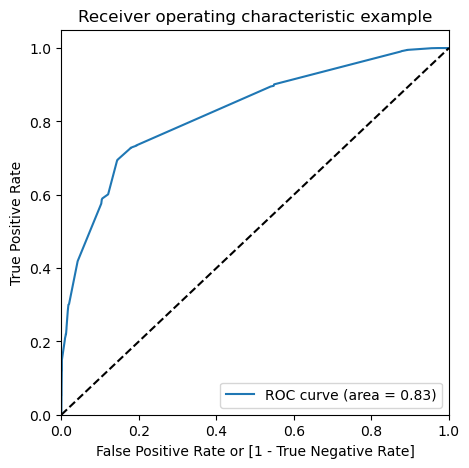

In [217]:
# preparing the ROC curve 

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(y_train_final.Convert, y_train_final.Convert_prob)

In [218]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_final[i] = y_train_final.Convert_prob.map(lambda x:1 if x > i else 0)
y_train_final.head()

,Convert,Convert_prob,Lead_Number,predicted,score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.213682,660737.0,0,21.0,1,1,1,0,0,0,0,0,0,0
1,0,0.162265,660728.0,0,16.0,1,1,0,0,0,0,0,0,0,0
2,0,0.213682,660727.0,0,21.0,1,1,1,0,0,0,0,0,0,0
3,0,0.562597,660719.0,1,56.0,1,1,1,1,1,1,0,0,0,0
4,1,0.425714,660681.0,0,43.0,1,1,1,1,1,0,0,0,0,0


In [226]:
cutoff_data = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cml = metrics.confusion_matrix(y_train_final.Convert, y_train_final[i])
    total = sum(sum(cml))
    accuracy = (cml[0,0] + cml[1,1])/total
    speci = cml[0,0]/(cml[0,0]+cml[0,1])
    sensi=cml[1,1]/(cml[1,0]+cml[1,1])
    cutoff_data.loc[i] = (i, accuracy,sensi,speci)
print(cutoff_data)

     prob  accuracy     sensi     speci
0.0   0.0  0.378523  1.000000  0.000000
0.1   0.1  0.450165  0.992097  0.120091
0.2   0.2  0.620532  0.896839  0.452242
0.3   0.3  0.784758  0.728785  0.818850
0.4   0.4  0.785860  0.727537  0.821383
0.5   0.5  0.794521  0.693844  0.855840
0.6   0.6  0.778775  0.586522  0.895870
0.7   0.7  0.723508  0.301165  0.980745
0.8   0.8  0.723351  0.298669  0.982012
0.9   0.9  0.698000  0.222130  0.987839


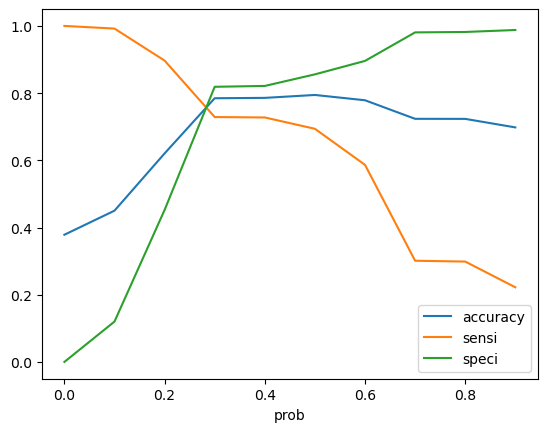

In [232]:
cutoff_data.plot.line(x='prob',y=['accuracy','sensi','speci'])
plt.show()

### Case One : When we hire summer interns

In [233]:
y_train_final['predicted_interns'] = y_train_final.Convert_prob.map(lambda x: 1 if x >0.2 else 0)

In [234]:
y_train_final['predicted_interns'].value_counts()

1    4318
0    2033
Name: predicted_interns, dtype: int64

In [ ]:
# When we hire summer interns we can call 4318 people based on the cutoff of 0.2

#### Financial Note

When we mark the model cutoff at 0.2, the sales team has 67 percent people (from the train set its 4318/6351) to call during this period. The accuracy of the Model is not the greatest. However, we will not miss people who could get converted as the sensitivity of the model at this cutoff is very high.

This allows us to not miss any customer who can get converted. Thus for the company this makes more financial sense during this period as:
1. We are completely focused on sales 
2. We have hired interns to do this job so the cost for result is very low 
3. We will be able to convert more customers hence more revenue 

### Case Two : When we make call with necessary

In [235]:
y_train_final['predicted_necessary'] = y_train_final.Convert_prob.map(lambda x: 1 if x >0.5 else 0)

In [236]:
y_train_final['predicted_necessary'].value_counts()

0    4114
1    2237
Name: predicted_necessary, dtype: int64

In [1]:
# When we calling on necessity we call 2293 people based on the cutoff of 0.5

#### Financial Note

When we can mark the model cutoff at 0.5, the sales team has 35 percent people (from the train set its 2237/6351) to call during this period. This percentage is very close to the actual conversion rate which is 37.85 percentage. The accuracy at this cutoff is almost the highest, the sensitivity is close to maximum and we will end up calling the most optimal set of customers. 

This allows us to only focus on the customers that are more likely to convert. Thus for the company this makes more financial sense during period as:
1. We have other things to focus on, so we wont be able to dedicate a lot of resources to calling 
2. We can make optimal use of our human resource as we have lesser customers to target who are more likely to convert
3. The sales team is able to focus on other work of higher importance 

## Making Predictions

In [237]:
# tarnsforming the continuous features in the test dataset 

final_test[numeric] = scaler.fit_transform(final_test[numeric])

In [238]:
final_test.head()

,Prospect ID,Lead Number,Total Time Spent on Website,Converted,Online Search,Other_ed,Select,Word Of Mouth,edu_someschool,Other Cities,...,Other_la,Page Visited on Website,sms_sent_la,yes_mastering_the_interview_copy,Email_Opened_lna,Modified,Olark_Chat_Conversation_lna,Other_na,Page_Visited_on_Website_lna,sms_sent_lna
3271,afc71cc4-67a4-42ae-89f7-779d20c5810d,628652,0.069102,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1490,a8b4e742-2cce-4280-8549-a4a7d51a0fe2,644500,0.665933,1,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
7936,774a3b07-491d-4311-ad51-b25cc8cc59ec,588935,0.032570,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4216,16b63196-0da9-4b2d-974d-21d8f625f5ef,619437,0.000000,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3830,cbd89429-18cd-47b1-9699-21987bd70a8e,623381,0.072183,0,0,0,1,0,0,1,...,0,0,0,1,1,0,0,0,0,0


In [239]:
# using the features in the test dataframe that were used to create our model 

x_test = x_test[col]

In [240]:
x_test.head()

,Other_lp,Potential Lead,lp_someschool,select_specs,Landing Page Submission,Lead Add Form,do_not_email_yes,Welingak Website,Other_na,sms_sent_lna
7288,0,0,0,0,0,0,0,0,0,1
1064,0,0,0,1,0,0,0,0,0,0
1927,0,1,0,0,0,0,0,0,0,0
128,0,0,0,0,1,0,1,0,1,0
8727,0,1,0,0,1,0,1,0,0,0


In [241]:
# dropping the feature that our model had shown to have very less significance

x_test.drop('Other_lp', axis=1,inplace =True )

In [242]:
# adding the constant to x_test

x_test_sm = sm.add_constant(x_test)

In [243]:
# creating the predictions based on the model 

y_test_pred = pred.predict(x_test_sm)
y_test_pred[:10]

7288    0.831152
1064    0.162265
1927    0.840717
128     0.208636
8727    0.265553
1605    0.643435
7205    0.162265
5431    0.162265
4991    0.643435
6248    0.020608
dtype: float64

In [244]:
# creating different columns to store the covert situation and the probability for the same

y_test_final = pd.DataFrame({'Convert' : y_test.values, 'Convert_prob' : y_test_pred})

In [245]:
y_test_final.head()

,Convert,Convert_prob
7288,1,0.831152
1064,0,0.162265
1927,1,0.840717
128,0,0.208636
8727,0,0.265553


In [246]:
# testing with a cutoff at 0.3 . We can use different cutoffs as required 

y_test_final['predicted'] = y_test_final.Convert_prob.map(lambda x: 1 if x >0.5 else 0)

In [247]:
# creating the confusion matrix 

confusion_one = metrics.confusion_matrix(y_test_final.Convert, y_test_final.predicted)
print(confusion_one)

[[1404  288]
 [ 306  725]]


In [248]:
# Predicted     not-churn    churn 
# Actual                  
# not-churn       1404       288
# churn            306      725

In [249]:
# the accuracy of the model 

print(metrics.accuracy_score(y_test_final.Convert, y_test_final.predicted))

0.7818582445831803


In [250]:
# true positives
tp1 = confusion_one[1,1] 

#true negatives
tn1 = confusion_one[0,0]

# false positives
fp1 = confusion_one[0,1]

# false negatives
fn1 = confusion_one[1,0]

In [251]:
# sensitivity of the model : A measure of how accurately does the model predict the positive outcomes
# sesitivity can also be termed as true positive rate 

tp1 /(tp1+fn1)

0.7032007759456838

In [252]:
# specificity of the model : A measure of how accurately does the model predict negative outcomes 

tn1 /(tn1+fp1)

0.8297872340425532

In [253]:
# false positive rate : A measure of how many 0s were predicted as 1 

fp1 /(tn1+fp1)

0.1702127659574468

#### Note

1. Model works well 
2. The accuracy, sensitivity, specificity are very close to the one generated by the train set on a similar cutoff
3. We can select different cutoff to increase the accuracy, sensitivity and specificity based on the requirement of the case in context